# TF First Neural Network

## Import Libraries

In [1]:
import tensorflow as tf
import numpy as np

print(tf.version.VERSION)

2.6.0


## Dataset

In [2]:
# define some training data (xs as inputs and ys as outputs)

xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float) 
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [3]:
print(xs, xs.shape)
print(ys, ys.shape)

[-1.  0.  1.  2.  3.  4.] (6,)
[-3. -1.  1.  3.  5.  7.] (6,)


## Define Model (NN Arquitecture)

In [8]:
# define a neural network with one neuron
# for more information on TF functions see: https://www.tensorflow.org/api_docs

model = tf.keras.Sequential([tf.keras.layers.Dense( units=1, input_shape=[1])])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


**Default parameters' inicialization**
- kernel_initializer ('ws') => 'glorot_uniform' (Xavier)
- bias_initializer  ('bs') => 'zeros'

**Viewing initial weights (parameters)**

In [10]:
model.get_weights() # list of parameters 

[array([[-1.3874117]], dtype=float32), array([0.], dtype=float32)]

In [11]:
print("wi = ", model.get_weights()[0][0][0])
print("b  = ", model.get_weights()[1][0])

wi =  -1.3874117
b  =  0.0


## Compile Model

In [12]:
# use stochastic gradient descent for optimization and
# the mean squared error loss function

model.compile(optimizer='sgd', loss='mean_squared_error')

In [13]:
model.save('my_first_model_no_training.h5')

In [14]:
print(model.predict([10.0]))

[[-13.874117]]


Inspecting Model with [Netron](https://netron.app)

## Training

In [15]:
# fit the model to the data (aka train the model)

history = model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 507ms/step - loss: 50.1230
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 39.8289
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 31.7219
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 25.3357
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 20.3037
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 16.3370
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 13.2088
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 10.7404
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 8.7912
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 7.2507
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 6.0318
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 5.0661
Epoch 13/500
1/1 [==============================] -

Inspect model

In [19]:
print("wi = ", model.get_weights()[0][0][0])
print("b  = ", model.get_weights()[1][0])

wi =  1.9965888
b  =  -0.9894241


In [20]:
# Saving the trained model
model.save('my_first_model_trained.h5')

## Test model

In [21]:
# Predict the output of a new data (Inference)

print(model.predict([10.0]))

[[18.976465]]


In [22]:
type(history.history)

dict

In [23]:
history.history.keys()

dict_keys(['loss'])

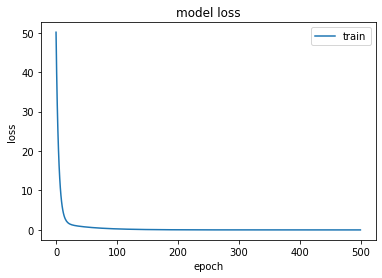

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()